In [5]:
import pandas as pd
from pymongo import MongoClient

# Conexión a la base de datos MongoDB
client = MongoClient('mongodb://localhost:27017/')
# Definir un filtro vacío para obtener todos los documentos
filter = {}
# Realizar la consulta
cursor= client['Videojuegos']['Jugadores'].find(filter)
cursor2= client['Videojuegos']['Ciudades'].find(filter)
# Convertir los resultados a una lista de diccionarios
jugadores = list(cursor)
ciudades = list(cursor2)

In [6]:
dataframeciudades = pd.DataFrame(jugadores)
dataframejugadores = pd.DataFrame(ciudades)

In [ ]:
print(dataframeciudades.head())  
print(dataframejugadores.head())

In [ ]:
#Limpiar datos
dataframe = dataframeciudades.dropna()
dataframe2 = dataframejugadores.dropna()

dataframe2

In [10]:
#Limpiar dataframe
dataframelimpio = len(dataframe)
dataframelimpio2 = len(dataframe2)

In [11]:
#Verificar limpiado
print("El largo del DataFrame es:", dataframelimpio)

El largo del DataFrame es: 1000


In [12]:
print("El largo del dataframe es:" , dataframelimpio2)

El largo del dataframe es: 258


In [24]:
dataframe2['Ciudad'] = dataframe2['Ciudad'].str.split(',').str[0]
#lIMPIAR DATAFRAME CIUDAD 

C:\Users\User\AppData\Local\Temp\ipykernel_12224\3809192615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2['Ciudad'] = dataframe2['Ciudad'].str.split(',').str[0]


In [25]:
# Convertir los códigos de ciudad en dataframe2 a mayúsculas
dataframe['codigociudad'] = dataframe['codigociudad'].str.upper()

In [37]:
#renombrar columnas para que coincidan
dataframe2.rename(columns={'Ciudad-Code': 'codigociudad'}, inplace=True)
dataframe2

C:\Users\User\AppData\Local\Temp\ipykernel_12224\1949507031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2.rename(columns={'Ciudad-Code': 'codigociudad'}, inplace=True)


,_id,Contiente,Continente-Code,Ciudad,codigociudad,Ciudad-Code-3,Ciudad-Numero
0,65e49cc158cb8e2f98fc662c,Asia,AS,Afghanistan,AF,AFG,4.0
1,65e49cc158cb8e2f98fc662d,Europe,EU,Albania,AL,ALB,8.0
2,65e49cc158cb8e2f98fc662e,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,65e49cc158cb8e2f98fc662f,Africa,AF,Algeria,DZ,DZA,12.0
4,65e49cc158cb8e2f98fc6630,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...,...
253,65e49cc158cb8e2f98fc6729,South America,SA,Venezuela,VE,VEN,862.0
254,65e49cc158cb8e2f98fc672a,Oceania,OC,Wallis and Futuna,WF,WLF,876.0
255,65e49cc158cb8e2f98fc672b,Oceania,OC,Samoa,WS,WSM,882.0
256,65e49cc158cb8e2f98fc672c,Asia,AS,Yemen,YE,YEM,887.0


In [39]:
# Fusionar los DataFrames basados en el código de ciudad en mayúsculas
dataframefinal = pd.merge(dataframe, dataframe2[['codigociudad', 'Ciudad']], on='codigociudad', how='left')

In [40]:
dataframefinal = dataframefinal.dropna()
# Ahora dataframefinal no contendrá filas con valores nulos
print(dataframefinal.head())

                        _id  Idjugador   nombre   apellido nickname  \
0  65e49cce58cb8e2f98fc6732       3883    Peter  Rasmussen  dupreeh   
1  65e49cce58cb8e2f98fc6733       3679  Andreas   Højsleth    Xyp9x   
2  65e49cce58cb8e2f98fc6734       3885  Nicolai     Reedtz   dev1ce   
3  65e49cce58cb8e2f98fc6735       3672    Lukas  Rossander   gla1ve   
4  65e49cce58cb8e2f98fc6736      17800     Emil       Reif   Magisk   

  codigociudad  total-ganancias                             juego  \
0           DK       1822989.41  Counter-Strike: Global Offensive   
1           DK       1799288.57  Counter-Strike: Global Offensive   
2           DK       1787489.88  Counter-Strike: Global Offensive   
3           DK       1652350.75  Counter-Strike: Global Offensive   
4           DK       1416448.64  Counter-Strike: Global Offensive   

                 genero   Ciudad  
0  First-Person Shooter  Denmark  
1  First-Person Shooter  Denmark  
2  First-Person Shooter  Denmark  
3  First-Person Sh

In [15]:
nombre_archivo_csv = "GM-jugadores.csv"
dataframefinal.to_csv(nombre_archivo_csv, index=False)
print("DataFrame guardado como CSV en la carpeta actual con el nombre:", nombre_archivo_csv)

DataFrame guardado como CSV en la carpeta actual con el nombre: GM-jugadores.csv


In [ ]:
dataframefinal

In [17]:
print(dataframefinal.columns)

Index(['Idjugador', 'nombre', 'apellido', 'nickname', 'codigociudad',
       'total-ganancias', 'juego', 'genero', 'Ciudad'],
      dtype='object')


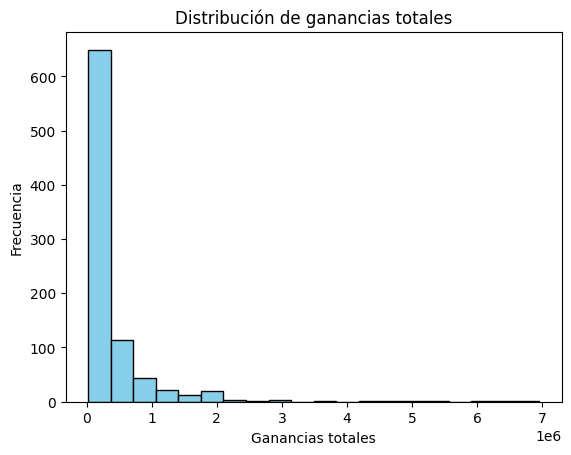

In [20]:
import matplotlib.pyplot as plt

# Histograma de las ganancias totales
plt.hist(dataframefinal['total-ganancias'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ganancias totales')
plt.ylabel('Frecuencia')
plt.title('Distribución de ganancias totales')
plt.show()

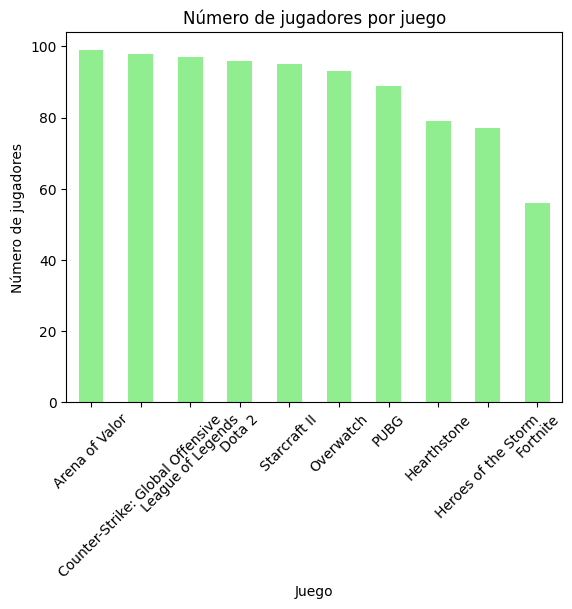

In [22]:
dataframefinal['juego'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Juego')
plt.ylabel('Número de jugadores')
plt.title('Número de jugadores por juego')
plt.xticks(rotation=45)
plt.show()

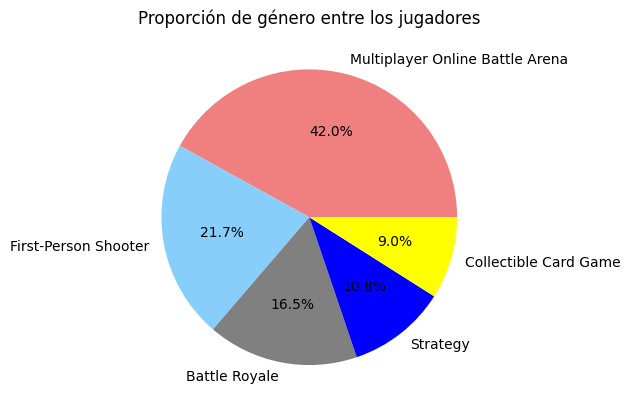

In [36]:
dataframefinal['genero'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue','gray','blue','yellow'])
plt.title('Proporción de género entre los jugadores')
plt.ylabel('')
plt.show()

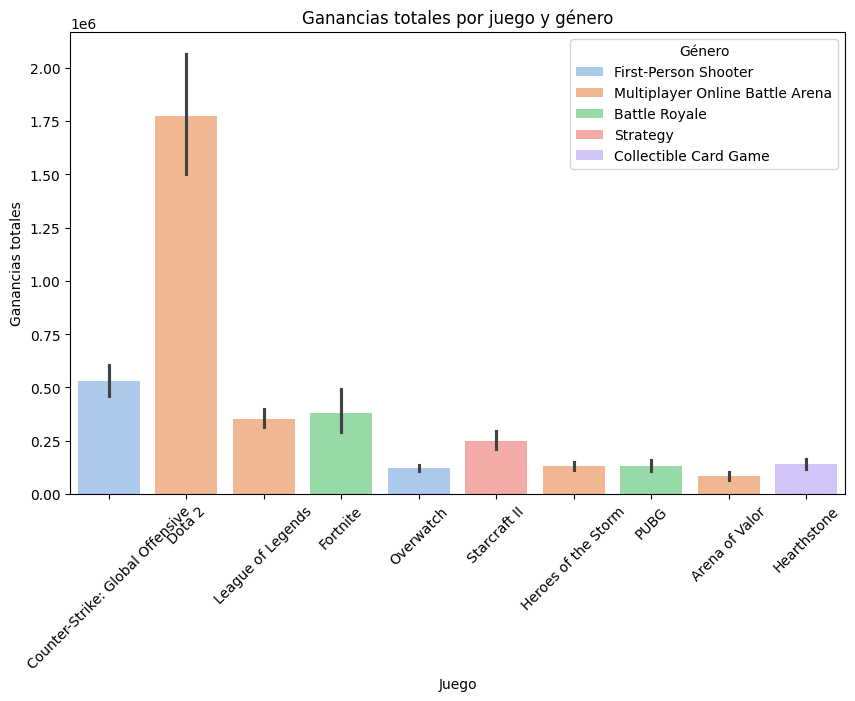

In [34]:
# Gráfico de dispersión con regresión para las ganancias totales y el número de jugadores
plt.figure(figsize=(10, 6))
sns.barplot(x='juego', y='total-ganancias', hue='genero', data=dataframefinal, palette='pastel')
plt.xlabel('Juego')
plt.ylabel('Ganancias totales')
plt.title('Ganancias totales por juego y género')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()